In [12]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/gold/chart/year/TWD')

In [13]:
type(dfs[0][:10]) #dfs is list
dfs[0][:10]

,日期,牌價幣別,商品重量,本行買入價格,本行賣出價格
0,2020/05/18,新台幣 (TWD),1公克,1680,1703
1,2020/05/15,新台幣 (TWD),1公克,1653,1676
2,2020/05/14,新台幣 (TWD),1公克,1634,1657
3,2020/05/13,新台幣 (TWD),1公克,1623,1645
4,2020/05/12,新台幣 (TWD),1公克,1621,1644
5,2020/05/11,新台幣 (TWD),1公克,1622,1645
6,2020/05/08,新台幣 (TWD),1公克,1634,1656
7,2020/05/07,新台幣 (TWD),1公克,1612,1635
8,2020/05/06,新台幣 (TWD),1公克,1623,1646
9,2020/05/05,新台幣 (TWD),1公克,1612,1635


In [15]:
df = dfs[0]
df.columns

Index(['日期', '牌價幣別', '商品重量', '本行買入價格', '本行賣出價格'], dtype='object')

In [19]:
df2 = df[['日期','本行買入價格']]
df2.head()

,日期,本行買入價格
0,2020/05/18,1680
1,2020/05/15,1653
2,2020/05/14,1634
3,2020/05/13,1623
4,2020/05/12,1621


In [22]:
#將date轉成index
df2.index = pandas.to_datetime(df2['日期'],format = '%Y/%m/%d')

In [23]:
df2.index

DatetimeIndex(['2020-05-18', '2020-05-15', '2020-05-14', '2020-05-13',
               '2020-05-12', '2020-05-11', '2020-05-08', '2020-05-07',
               '2020-05-06', '2020-05-05',
               ...
               '2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28',
               '2019-05-27', '2019-05-24', '2019-05-23', '2019-05-22',
               '2019-05-21', '2019-05-20'],
              dtype='datetime64[ns]', name='日期', length=247, freq=None)

In [35]:
df2.head()

,日期,本行買入價格
日期,,
2020-05-18,2020/05/18,1680
2020-05-15,2020/05/15,1653
2020-05-14,2020/05/14,1634
2020-05-13,2020/05/13,1623
2020-05-12,2020/05/12,1621


Populating the interactive namespace from numpy and matplotlib


C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


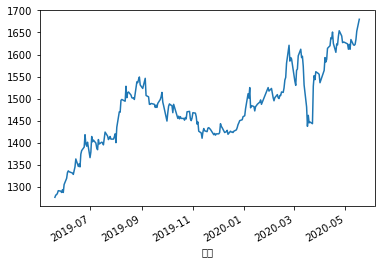

In [25]:
%pylab inline
# 可同時使用 NumPy + Matplotlib, 還可以 inline 畫圖
df2['本行買入價格'].plot(kind = 'line')

In [48]:
#不支援中文字型
from pylab import *
import matplotlib 
matplotlib.rcParams['font.family'] = ['Microsoft YaHei']
# 其中AR PL UMing CN代表：宋体。SimHei代表：黑体。

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'linalg', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


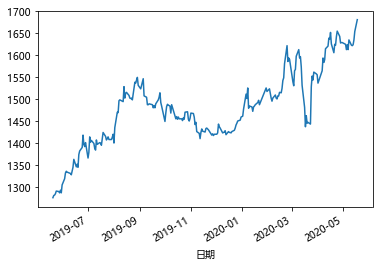

In [49]:
%pylab inline
df2['本行買入價格'].plot(kind = 'line')

In [50]:
df2.sort_index(inplace = True)

In [39]:
df2.head()

,日期,本行買入價格
日期,,
2019-05-20,2019/05/20,1276
2019-05-21,2019/05/21,1281
2019-05-22,2019/05/22,1282
2019-05-23,2019/05/23,1285
2019-05-24,2019/05/24,1291


In [51]:
df2['ma30'] = df2['本行買入價格'].rolling(window = 30).mean()
df2.tail()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,日期,本行買入價格,ma30
日期,,,
2020-05-12,2020/05/12,1621,1611.366667
2020-05-13,2020/05/13,1623,1613.433333
2020-05-14,2020/05/14,1634,1616.000000
2020-05-15,2020/05/15,1653,1619.266667
2020-05-18,2020/05/18,1680,1624.066667


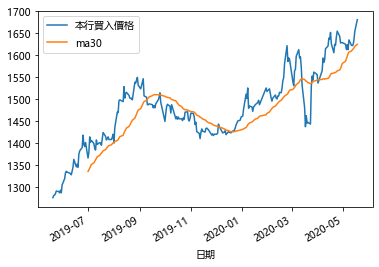

In [53]:
df2[['本行買入價格','ma30']].plot(kind = 'line')